In [1]:
# This is a regression problem
# The dataset contains several parameters which are considered important during the application for Masters Programs.
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=["Serial No."],inplace=True)

In [8]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [9]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [10]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
X_train.shape

(400, 7)

In [14]:
# Lets scale the data to the similar scale
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [16]:
X_train_scaled.shape

(400, 7)

In [17]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [18]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

In [21]:
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation='linear'))   # activation should be linear while working with the regression model using ANN


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["Accuracy"])

In [24]:
History = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3331 - Accuracy: 0.0000e+00 - val_loss: 0.3115 - val_Accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2463 - Accuracy: 0.0000e+00 - val_loss: 0.2343 - val_Accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1819 - Accuracy: 0.0000e+00 - val_loss: 0.1704 - val_Accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1291 - Accuracy: 0.0000e+00 - val_loss: 0.1177 - val_Accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0868 - Accuracy: 0.0000e+00 - val_loss: 0.0772 - val_Accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0550 - Accuracy: 0.0000e+00 - val_loss: 0.0483 - val_Accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0335 - Accuracy: 0.0000e+00 - v

Epoch 56/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0060 - Accuracy: 0.0000e+00 - val_loss: 0.0067 - val_Accuracy: 0.0000e+00
Epoch 57/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0060 - Accuracy: 0.0000e+00 - val_loss: 0.0067 - val_Accuracy: 0.0000e+00
Epoch 58/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0059 - Accuracy: 0.0000e+00 - val_loss: 0.0067 - val_Accuracy: 0.0000e+00
Epoch 59/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0059 - Accuracy: 0.0000e+00 - val_loss: 0.0066 - val_Accuracy: 0.0000e+00
Epoch 60/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0059 - Accuracy: 0.0000e+00 - val_loss: 0.0066 - val_Accuracy: 0.0000e+00
Epoch 61/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0058 - Accuracy: 0.0000e+00 - val_loss: 0.0065 - val_Accuracy: 0.0000e+00
Epoch 62/100
10/10 [==============================] - 0s 1ms/step - loss: 0.0058 - Accuracy: 0.0000e

In [25]:
import matplotlib.pyplot as plt

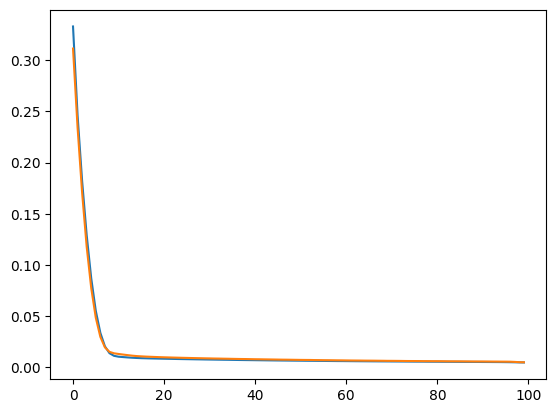

In [26]:
plt.plot(History.history["loss"])
plt.plot(History.history["val_loss"])

In [28]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 882us/step


In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)  # very bad accuracy

0.7360455828410264

In [ ]:
plt.plot(His)